<a href="https://colab.research.google.com/github/dpdms529/ML/blob/main/homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = '' # username
os.environ['KAGGLE_KEY'] = '' # key

In [ ]:
!kaggle datasets download -d rsadiq/salary

  0% 0.00/392 [00:00<?, ?B/s]
100% 392/392 [00:00<00:00, 609kB/s]


In [ ]:
!unzip salary.zip

Archive:  salary.zip
  inflating: Salary.csv              


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('Salary.csv')

In [ ]:
x_data = np.array(df['YearsExperience'], dtype=np.float32)
y_data = np.array(df['Salary'],dtype=np.float32)

x_data = x_data.reshape((-1,1))
y_data = y_data.reshape((-1,1))

print(x_data.shape)
print(y_data.shape)

(35, 1)
(35, 1)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(28, 1) (7, 1)
(28, 1) (7, 1)


In [ ]:
model = Sequential([
                    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=100
)

Epoch 1/100
1/1 [==============================] - 0s 303ms/step - loss: 8667364352.0000 - val_loss: 144188240.0000
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 520607488.0000 - val_loss: 311875424.0000
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 218536064.0000 - val_loss: 245428432.0000
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 205774192.0000 - val_loss: 254774432.0000
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 203696656.0000 - val_loss: 250785792.0000
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 202028400.0000 - val_loss: 249410208.0000
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 200390112.0000 - val_loss: 247556608.0000
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 198767840.0000 - val_loss: 245814448.0000
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 197160880.0000

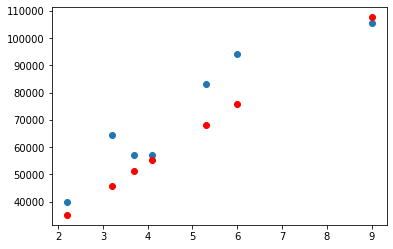

In [ ]:
y_pred = model.predict(x_val)

plt.scatter(x_val, y_val)
plt.scatter(x_val, y_pred, color='r')
plt.show()